# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [168]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    
    # ... ENTER YOUR CODE HERE ...
    
    x = x0 
    x_i = x0 - 1 #in order to make it work in the beginning I artificially made x-x_i = x0 - x0 + 1 = 1 > 1e-5
    i = 0 #counter of iterations
    while abs(x - x_i) >= eps:
        x_i = x #saving the previous value
        x  = x - f(x) / fder(x) 
        i += 1  
    return x, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [169]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return x**2-1
def fder(x):
    return 2*x

x, i = newton_iteration(f, fder, -0.5)
print('f(x)=0 if x =', x)
print('There has been', i, 'iterations to figure it out.')
x, i = newton_iteration(f, fder, 3)
print('f(x)=0 if x =', x)
print('There has been', i, 'iterations to figure it out.') 
#here we can see that the result depends on a sign of an initial value

f(x)=0 if x = -1.000000000000001
There has been 5 iterations to figure it out.
f(x)=0 if x = 1.0
There has been 6 iterations to figure it out.


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [170]:
# ... ENTER YOUR CODE HERE ...
def newton_iteration_with_m(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x = x0 
    x_i = x0 - 1 
    i = 0
    while abs(x - x_i) >= eps:
        x_i = x #saving the previous value
        x = x - m * f(x) / fder(x) 
        i += 1  
        if i == 1000:
            break
    return x, i

def f(x):
    return (x**2-1)**2
def fder(x):
    return 4*x*(x**2-1)

for m in range(5):
    x, i = newton_iteration_with_m(f, fder, 2 , m+1)
    print('f(x)=0 if x =', x)
    if i!=1000:
        print('There has been', i, 'iterations to figure it out.','\n') 
    else:
        print('Iterations wandered off','\n')

f(x)=0 if x = 1.0000078296573287
There has been 18 iterations to figure it out. 

f(x)=0 if x = 1.000000000000001
There has been 5 iterations to figure it out. 

f(x)=0 if x = 0.9999978588127855
There has been 17 iterations to figure it out. 

f(x)=0 if x = 2.0
Iterations wandered off 

f(x)=0 if x = 0.5506661261324481
Iterations wandered off 



#### So we get that if m equals the multiplicity of the root, the convergence is the fastest. Moreover, starting from m = 4 we got infinite loops

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

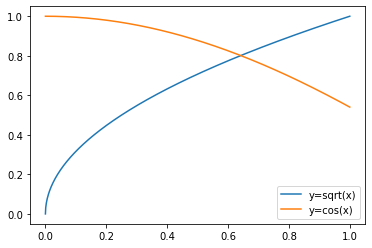

In [171]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 1, num = 1000)
plt.plot(x, np.sqrt(x), label='y=sqrt(x)' )
plt.plot(x, np.cos(x), label='y=cos(x)' )
plt.legend()
plt.show()

#### So I expect the root to be nearby 0.6. It will be an initial value

In [172]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    x = x0
    x_i = x0 - 1
    i = 0
    while abs(x - x_i) >= eps:
        x_i = x #saving the previous value, as done before
        x = x - f(x) 
        i += 1  
        if i == 1000:
            break
        
    return x, i

def f(x):
    return np.sqrt(x) - np.cos(x) #it is convinient to solve f(x)=g(x) as f(x) - g(x) = 0

x, i = fixed_point(f, 0.6)
print('sqrt(x) = cos(x) if x =', x)
print('There has been', i, 'iterations to figure it out.')

sqrt(x) = cos(x) if x = 0.6417154785546847
There has been 7 iterations to figure it out.


In [173]:
def fixed_point_with_a(f, x0, a, eps=1e-5, maxiter=1000): #the same with parameter a given
    x = x0
    x_i = x0 - 1
    i = 0
    while abs(x - x_i) >= eps:
        x_i = x 
        x = x - a*f(x) 
        i += 1  
        if i == 1000:
            break
        
    return x, i

def f(x):
    return np.sqrt(x) - np.cos(x)
def fder(x):
    return 1/(2*np.sqrt(x))+np.sin(x)
x = np.linspace(0.6, 0.65, 100000) 

a0 = 2 / (np.min(np.abs(fder(x))) + np.max(np.abs(fder(x)))) #counting the optimal a according to the formula

x, i = fixed_point_with_a(f, 0.6, a0)
print('sqrt(x) = cos(x) if x =', x)
print('There has been', i, 'iterations to figure it out.')

sqrt(x) = cos(x) if x = 0.6417143700661961
There has been 3 iterations to figure it out.


#### We see that with this a0 we need only 3 iterations to approach the result

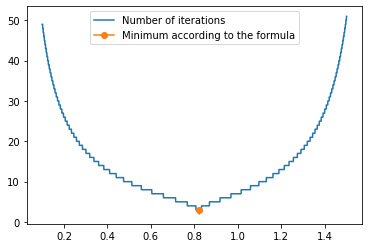

In [174]:
a = np.linspace(0.1, 1.5, 10000) 

i = [fixed_point_with_a(f, 0.6, k)[1] for k in a] #number of iterations from different a if a<1.5 and a>0.1
plt.plot(a, i, label='Number of iterations' )
plt.plot(a0, fixed_point_with_a(f, 0.6, a0)[1], marker='o', label='Minimum according to the formula')
plt.legend()
plt.show()

#### As we see here formula works good, and with good initial value it gives an accurate result

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.